In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [41]:
df_train = pd.read_csv('./train.csv')

df_train.sort_values(by=['jobID'],axis=0).head(10)

,userID,jobID,applied
276,d2fcd16484b4dc546a2495c261c433db,00ac8ed3b4327bdd4ebbebcb2ba10a00,0
3804,6bd22a86b1f7a3a11de928d301f86d67,00ac8ed3b4327bdd4ebbebcb2ba10a00,1
4384,4802630177809fcf861411501a443abb,00ac8ed3b4327bdd4ebbebcb2ba10a00,1
1779,d7b2c4284fda91263ab9b89254cd7c43,00ac8ed3b4327bdd4ebbebcb2ba10a00,0
672,d52d50218e9abe66438cefaee22a28da,00ac8ed3b4327bdd4ebbebcb2ba10a00,1
282,c07e670b7bc8ebfdd99f4091ff2410ff,00ac8ed3b4327bdd4ebbebcb2ba10a00,0
4039,6bd22a86b1f7a3a11de928d301f86d67,00e26af6ac3b1c1c49d7c3d79c60d000,0
731,42c2cc0b74b0f4a3a7e52d1ff617e05e,00e26af6ac3b1c1c49d7c3d79c60d000,0
22,b3c865b84617fa5e555865ebe0e54612,00e26af6ac3b1c1c49d7c3d79c60d000,0
629,7c33ebcd1cd8a46827f716879fb51a31,00ec53c4682d36f5c4359f4ae7bd7ba1,0


In [163]:
df_train.isnull().sum()

userID     0
jobID      0
applied    0
dtype: int64

In [164]:
df_job_tags = pd.read_csv('./job_tags.csv')
df_job_tags.sort_values(by=['jobID'],axis=0).head(10)
df_job_tags.isnull().sum()

jobID    0
tagID    0
dtype: int64

In [165]:
df = pd.merge(df_train,df_job_tags,how='inner')
df = df[['userID','jobID','tagID','applied']]
df.sort_values(by=['jobID'],axis=0).head(5)

df.isnull().sum()

userID     0
jobID      0
tagID      0
applied    0
dtype: int64

In [45]:
df = pd.merge(df, df_user_tags,how='inner')
df = df[['userID','jobID','tagID','applied']]
#df.sort_values(by=['jobID'],axis=0).head(5)
df.shape

(61322, 4)

In [53]:
df_user_tags = pd.read_csv('./user_tags.csv')
df_user_tags.head(10)

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a
5,e576423831e043f7928d9ac113abbe6f,e4873aa9a05cc5ed839561d121516766
6,3532ee676d13916210e903ff4d85c04f,aace49c7d80767cffec0e513ae886df0
7,3532ee676d13916210e903ff4d85c04f,f91e24dfe80012e2a7984afa4480a6d6
8,3203e06c1efc6fdb23016650d1d1888c,884d79963bd8bc0ae9b13a1aa71add73
9,3203e06c1efc6fdb23016650d1d1888c,a58149d355f02887dfbe55ebb2b64ba3


In [75]:
df2 = df_user_tags.groupby('userID', as_index=False).count()

In [76]:
df2

,userID,tagID
0,0004289ee1c7b8b08c77e19878106ae3,178
1,00dd1479a58930a357e7b4e2ab4c9f33,91
2,015b469419f616144c13e0194f880af7,40
3,01ed443356f762e9132b58f8c80e131d,82
4,03c60b7fc8519077914166ebcfbd6a34,25
...,...,...
191,f98e712b83a95b07ef771150ecee9cd4,71
192,fa2a28ade168508972790316e314d47e,40
193,fd1b4044581c63b9cb16d91958302072,110
194,fdfa9a38cf3d8d850a6fd47b438bfe43,162


In [162]:
df_ex = pd.DataFrame(range(1,6))
df_ex
df_ex2 = pd.Series(range(1,6))
df_ex2

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [79]:
df_tags = pd.read_csv('./tags.csv')
df_tags.head()

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python


In [80]:
df_tags.shape

(887, 2)

In [122]:
df_job_companies = pd.read_csv('./job_companies.csv')
df_job_companies.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [137]:
df3 = df_job_companies.replace(np.nan,'1-10')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   companyID    733 non-null    object
 1   jobID        733 non-null    object
 2   companySize  733 non-null    object
dtypes: object(3)
memory usage: 17.3+ KB


In [145]:
df4 = pd.DataFrame(df_sort['companyID'].groupby(df_sort['companySize']).count())
df4 = df4.reset_index()


In [146]:
 
interest_li = ['1-10','11-50','51-100','101-200','201-500','501-1000','1000이상']
df_sort = df4[df4['companySize'].isin(interest_li)].copy() # 먼저, 데이터 프레임에서 관심값 추출
sorterIndex = dict(zip(interest_li, range(len(interest_li)))) # 정렬을 위한 dictionary 생성
df_sort['sorter'] = df_sort['companySize'].map(sorterIndex) # 해당 dictionary를 이용해 정렬을 위한 열('sorter') 생성
df_sort.sort_values('sorter',inplace=True) # sorter를 기준으로 정렬
df_sort.drop('sorter', 1, inplace = True) # sorter 열 삭제
df_sort

,companySize,companyID
0,1-10,190
2,11-50,260
5,51-100,142
1,101-200,60
3,201-500,56
4,501-1000,12


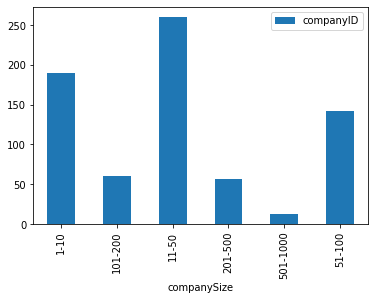

In [159]:
df4.index = df4['companySize']
df4.plot(kind='bar')

In [170]:
a = [1,2,3,4]
b = [2,3,4,5]
A = pd.Series(a,name='h')
B = pd.Series(b,name='h')
df = pd.merge(A,B,how='inner')
df

,h
0,2
1,3
2,4


In [171]:
df_job_companies = pd.read_csv('./job_companies.csv')
df_job_companies.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [176]:
df_job_companies.groupby('companySize').count().median()

companyID    60.0
jobID        60.0
dtype: float64

In [180]:
df_job_companies['companySize'] = df_job_companies['companySize'].fillna(df_job_companies.groupby('companySize').count().median())
df_job_companies

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN
...,...,...,...
728,b5dc4e5d9b495d0196f61d45b26ef33e,fa3a3c407f82377f55c19c5d403335c7,51-100
729,2dace78f80bc92e6d7493423d729448e,d7a728a67d909e714c0774e22cb806f2,51-100
730,443cb001c138b2561a0d90720d6ce111,d81f9c1be2e08964bf9f24b15f0e4900,NaN
731,b5b41fac0361d157d9673ecb926af5ae,ae0eb3eed39d2bcef4622b2499a05fe6,NaN


In [186]:
df2 = pd.DataFrame(np.array([[1, 2, 20, np.nan], [4, np.nan, 5, 6], [np.nan,7, 8, 9]]),
                     columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,1.0,2.0,20.0,NaN
1,4.0,NaN,5.0,6.0
2,NaN,7.0,8.0,9.0


In [187]:
df2['a'] = df2['a'].fillna(df2.a.mean())
df2['b'] = df2['b'].fillna(df2.b.mean())
df2['d'] = df2['d'].fillna(df2.d.mean())
df2

,a,b,c,d
0,1.0,2.0,20.0,7.5
1,4.0,4.5,5.0,6.0
2,2.5,7.0,8.0,9.0


In [189]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(df2))
train_data_robustScaled = robustScaler.transform(df2)
train_data_robustScaled

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


array([[-1. , -1. ,  1.6,  0. ],
       [ 1. ,  0. , -0.4, -1. ],
       [ 0. ,  1. ,  0. ,  1. ]])

In [190]:
quartiles = np.percentile(df2['c'], [25,50,75])
mu = quartiles[1]
sig = 0.74*(quartiles[2] - quartiles[0])
quartiles

array([ 6.5,  8. , 14. ])

In [191]:
df2['c']

0    20.0
1     5.0
2     8.0
Name: c, dtype: float64

In [196]:
s = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2020', periods=100))
s

2020-01-01    1.224531
2020-01-02    0.206485
2020-01-03    0.124324
2020-01-04   -0.929800
2020-01-05    1.371926
                ...   
2020-04-05    0.825769
2020-04-06    1.345165
2020-04-07    0.112656
2020-04-08   -0.234747
2020-04-09   -1.499845
Freq: D, Length: 100, dtype: float64